In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset("social_bias_frames")
pdtrain = pd.DataFrame(dataset["train"])
pdval = pd.DataFrame(dataset["validation"])
ptest = pd.DataFrame(dataset["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# pre processing of the str1
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
def preprocess_str1(str1):
    str1 = str1.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(str1)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [word for word in tokens if not re.match(r'@[^\s]+', word)]
    umls_pattern = r'\b(?:UMLS:[A-Z\d]+)\b'
    tokens = [word for word in tokens if not re.match(umls_pattern, word)]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_str1 = ' '.join(tokens)
    return processed_str1
str1 = "!!@@myuser is a joke to you are you!!! cmon man"
processed_str1 = preprocess_str1(str1)
print(processed_str1)

myuser joke cmon man


In [ ]:
pdtrain["post"] = pdtrain["post"].apply(lambda post : preprocess_str1(post))

In [ ]:
pdval["post"] = pdval["post"].apply(lambda post : preprocess_str1(post))
ptest["post"] = ptest["post"].apply(lambda post : preprocess_str1(post))

In [ ]:
ptest["post"][6]

'u hitting back u got ta call bitch love dont u dare call em slut'

In [ ]:
# Removing the columns not useful to us
print(pdtrain.columns)

Index(['whoTarget', 'intentYN', 'sexYN', 'sexReason', 'offensiveYN',
       'annotatorGender', 'annotatorMinority', 'sexPhrase',
       'speakerMinorityYN', 'WorkerId', 'HITId', 'annotatorPolitics',
       'annotatorRace', 'annotatorAge', 'post', 'targetMinority',
       'targetCategory', 'targetStereotype', 'dataSource'],
      dtype='object')


In [ ]:
pdtrain = pdtrain[(pdtrain['post'] != '') & (pdtrain['targetStereotype'] != '')]
pdval = pdval[(pdval['post'] != '') & (pdval['targetStereotype'] != '')]
ptest = ptest[(ptest['post'] != '') & (ptest['targetStereotype'] != '')]

In [ ]:
pdtrain['input_sequence'] = pdtrain['post'] + " [SEP] " + pdtrain['whoTarget'] + " [SEP] " + pdtrain['intentYN'] + " [SEP] " + pdtrain['sexYN'] + " [SEP] " + pdtrain['sexReason'] + " [SEP] " + pdtrain['offensiveYN'] + " [SEP] " + pdtrain['annotatorGender'] + " [SEP] " + pdtrain['annotatorMinority'] + " [SEP] " + pdtrain['sexPhrase'] + " [SEP] " + pdtrain['speakerMinorityYN'] + " [SEP] " + pdtrain['annotatorPolitics'] + " [SEP] " + pdtrain['annotatorRace'] + " [SEP] " + pdtrain['annotatorAge'] + " [SEP] " + pdtrain['targetMinority'] + " [SEP] " + pdtrain['targetCategory']

<ipython-input-13-d532bc7147b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdtrain['input_sequence'] = pdtrain['post'] + " [SEP] " + pdtrain['whoTarget'] + " [SEP] " + pdtrain['intentYN'] + " [SEP] " + pdtrain['sexYN'] + " [SEP] " + pdtrain['sexReason'] + " [SEP] " + pdtrain['offensiveYN'] + " [SEP] " + pdtrain['annotatorGender'] + " [SEP] " + pdtrain['annotatorMinority'] + " [SEP] " + pdtrain['sexPhrase'] + " [SEP] " + pdtrain['speakerMinorityYN'] + " [SEP] " + pdtrain['annotatorPolitics'] + " [SEP] " + pdtrain['annotatorRace'] + " [SEP] " + pdtrain['annotatorAge'] + " [SEP] " + pdtrain['targetMinority'] + " [SEP] " + pdtrain['targetCategory']


In [ ]:
pdval['input_sequence'] = pdval['post'] + " [SEP] " + pdval['whoTarget'] + " [SEP] " + pdval['intentYN'] + " [SEP] " + pdval['sexYN'] + " [SEP] " + pdval['sexReason'] + " [SEP] " + pdval['offensiveYN'] + " [SEP] " + pdval['annotatorGender'] + " [SEP] " + pdval['annotatorMinority'] + " [SEP] " + pdval['sexPhrase'] + " [SEP] " + pdval['speakerMinorityYN'] + " [SEP] " + pdval['annotatorPolitics'] + " [SEP] " + pdval['annotatorRace'] + " [SEP] " + pdval['annotatorAge'] + " [SEP] " + pdval['targetMinority'] + " [SEP] " + pdval['targetCategory']

<ipython-input-14-38b86ab402c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdval['input_sequence'] = pdval['post'] + " [SEP] " + pdval['whoTarget'] + " [SEP] " + pdval['intentYN'] + " [SEP] " + pdval['sexYN'] + " [SEP] " + pdval['sexReason'] + " [SEP] " + pdval['offensiveYN'] + " [SEP] " + pdval['annotatorGender'] + " [SEP] " + pdval['annotatorMinority'] + " [SEP] " + pdval['sexPhrase'] + " [SEP] " + pdval['speakerMinorityYN'] + " [SEP] " + pdval['annotatorPolitics'] + " [SEP] " + pdval['annotatorRace'] + " [SEP] " + pdval['annotatorAge'] + " [SEP] " + pdval['targetMinority'] + " [SEP] " + pdval['targetCategory']


In [ ]:
ptest['input_sequence'] = ptest['post'] + " [SEP] " + ptest['whoTarget'] + " [SEP] " + ptest['intentYN'] + " [SEP] " + ptest['sexYN'] + " [SEP] " + ptest['sexReason'] + " [SEP] " + ptest['offensiveYN'] + " [SEP] " + ptest['annotatorGender'] + " [SEP] " + ptest['annotatorMinority'] + " [SEP] " + ptest['sexPhrase'] + " [SEP] " + ptest['speakerMinorityYN'] + " [SEP] " + ptest['annotatorPolitics'] + " [SEP] " + ptest['annotatorRace'] + " [SEP] " + ptest['annotatorAge'] + " [SEP] " + ptest['targetMinority'] + " [SEP] " + ptest['targetCategory']

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import TrainingArguments, Trainer
from datasets import load_dataset, load_metric
# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2", padding_side="left")

In [ ]:
train_data = pd.DataFrame({"input_sequence":pdtrain["input_sequence"],"targetStereotype":pdtrain["targetStereotype"]})
val_data = pd.DataFrame({"input_sequence":pdval["input_sequence"],"targetStereotype":pdval["targetStereotype"]})
test_data = pd.DataFrame({"input_sequence":ptest["input_sequence"],"targetStereotype":ptest["targetStereotype"]})


In [ ]:
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
def tokenize_function(examples):
    inputs = tokenizer(examples['input_sequence'], return_tensors='pt', padding='max_length', max_length=300, truncation=True)
    if examples['input_sequence'] == "":
        inputs = torch.full((1, 300), 50256, dtype=torch.long)
    else:
        inputs = tokenizer(examples['input_sequence'], return_tensors='pt', padding='max_length', max_length=300, truncation=True)['input_ids']
    if examples['targetStereotype'] == "":
        labels = torch.full((1, 300), 50256, dtype=torch.long)
    else:
        labels = tokenizer(examples['targetStereotype'], return_tensors='pt', padding='max_length', max_length=300, truncation=True)['input_ids']
    return {'input_ids': inputs, 'labels': labels}

train_data = train_data.apply(tokenize_function, axis=1)
val_data = val_data.apply(tokenize_function, axis=1)

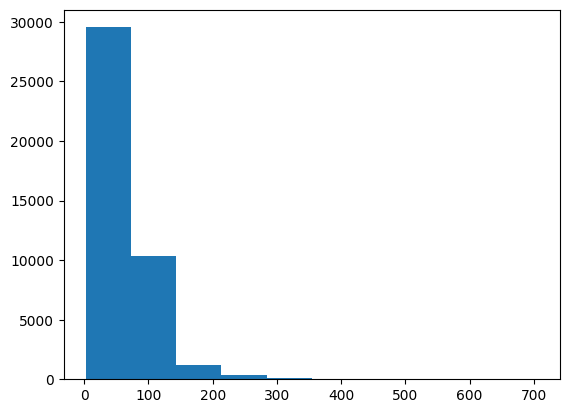

In [ ]:
import matplotlib.pyplot as plt
vec = []
for i in pdtrain["post"]:
    vec.append(len(i))
plt.hist(vec)
plt.show()

In [ ]:
train_data[7]['input_ids'].shape

torch.Size([1, 300])

In [ ]:
for i, entry in enumerate(train_data):
    input_ids_shape = entry['input_ids'].shape
    if input_ids_shape != torch.Size([1, 300]):
        print(f"Entry {i} in train_data has unexpected input_ids shape: {input_ids_shape}")
        break

# Check input_ids shape for each entry in val_data
for i, entry in enumerate(val_data):
    input_ids_shape = entry['input_ids'].shape
    if input_ids_shape != torch.Size([1, 300]):
        print(f"Entry {i} in val_data has unexpected input_ids shape: {input_ids_shape}")
        break

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
import os

directory_path = '/content/model'
if os.path.exists(directory_path):
    print("Directory exists. Proceeding...")
    # Your code here
else:
  os.mkdir("/content/model")
  print("Directory does not exist. Please create the directory or provide a valid path.")

Directory exists. Proceeding...


In [ ]:
training_args = TrainingArguments(
    output_dir='/content/model',
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    eval_steps=2000,
    save_steps=2000,
    logging_steps=2000,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
)

trainer.train()

Step,Training Loss,Validation Loss
2000,0.116800,0.098619


TrainOutput(global_step=2607, training_loss=0.11274769720466007, metrics={'train_runtime': 3777.5309, 'train_samples_per_second': 11.041, 'train_steps_per_second': 0.69, 'total_flos': 6385528166400000.0, 'train_loss': 0.11274769720466007, 'epoch': 1.0})

In [ ]:
test_data = test_data.apply(tokenize_function, axis=1)

In [ ]:
train_data[0]

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 502

In [ ]:
import logging

# Set the logging level to ignore warnings
logging.getLogger("transformers").setLevel(logging.ERROR)

In [ ]:
model.eval()
def give_pred(stry):
    with torch.no_grad():
        input_ids = stry['input_ids'].to(device)
        output = model.generate(input_ids=input_ids, max_length=310, num_return_sequences=1)
        # print(output)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

# pred = [give_pred(x) for x in test_data]

In [ ]:
give_pred(test_data[0])

'u hitting back u got ta call bitch love dont u dare call em slut [SEP] 1.0 [SEP] 1.0 [SEP] 0.0 [SEP]  [SEP] 1.0 [SEP] man [SEP]  [SEP]  [SEP] 0.0 [SEP] mod-liberal [SEP] white [SEP] 27.0 [SEP] women [SEP] gender'

In [ ]:
pred[10]

'ReachtheeCLIMAX bitch cant cook know suck dick one [SEP] 1.0 [SEP] 0.66 [SEP] 1.0 [SEP] oral sex [SEP] 1.0 [SEP] woman [SEP]  [SEP] suck dick [SEP] 0.0 [SEP] liberal [SEP] white [SEP] 45.0 [SEP] women [SEP] gender'

In [ ]:
pred[5]

'Fuck bitch send dude child support court youre petty [SEP] 1.0 [SEP] 0.66 [SEP] 0.0 [SEP]  [SEP] 0.5 [SEP] woman [SEP] gender, sexuality, mental illness [SEP]  [SEP] 0.0 [SEP] liberal [SEP] white [SEP] 28.0 [SEP] women [SEP] gender are'

In [ ]:
train_data[0]

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 502

In [ ]:
train_data[0]

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 502